# Atividade: Neurônio Artificial
**INSTITUTO FEDERAL DE MINAS GERIAS**
*Departamento de Engenharia e Computação*

**Professor:** Ciniro Nametala

**Aluno:** Euler Gomes


In [39]:
#importação das bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

### Exercício 1: Neurônio

In [40]:
#função neurônio
def neuronio(x1,x2, w0, w1, w2, bias):
    u = x1*w1 + x2*w2 + bias*w0
    if u < 0: #função degrau
        return 0
    else:
        return 1

In [41]:
#leitura de dados
dados = pd.read_csv('amostrabivariada.csv', sep=';', decimal=',')

#convertendo para float se necessario
dados['x'] = pd.to_numeric(dados['x'], errors='coerce')
dados['y'] = pd.to_numeric(dados['y'], errors='coerce')

dados.head() #primeiras 5 linhas do dataset

,x,y
0,1.183988,1.832880
1,1.523565,2.293337
2,2.199241,2.342880
3,2.768052,2.179136
4,2.165374,1.888445


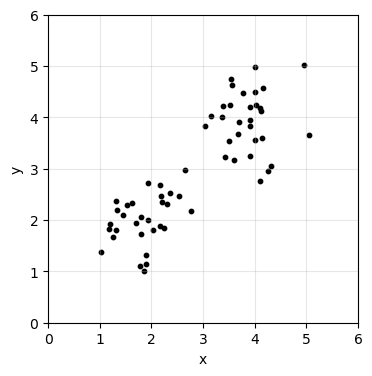

In [42]:
#criando o grafico de dispersão
plt.figure(figsize=(4,4))
plt.scatter(dados['x'], dados['y'], c='black', s=10)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=.3)
plt.show()

In [43]:
#instanciacao dos pesos e do bias
w0 = -6
w1 = -1
w2 = -1
bias = -1

#aplicando a funcao neuronio
classificacoes = []
for i, linha in dados.iterrows():
    classe = neuronio(linha['x'], linha['y'],w0,w1,w2, bias)
    classificacoes.append(classe)

#adicionando as classificacoes ao dataframe
dados['classe'] = classificacoes
dados.head()

,x,y,classe
0,1.183988,1.832880,1
1,1.523565,2.293337,1
2,2.199241,2.342880,1
3,2.768052,2.179136,1
4,2.165374,1.888445,1


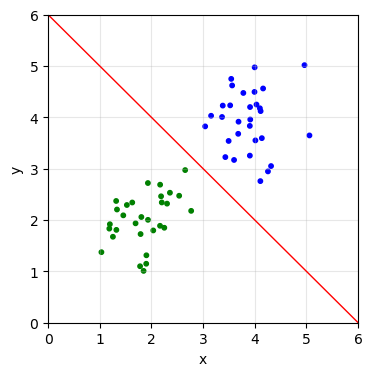

In [44]:
plt.figure(figsize=(4,4))
cores = ['blue' if c == 0 else 'green' for c in dados['classe']]
plt.scatter(dados['x'], dados['y'], c=cores, s=10)

#gerando reta de separacao
eixox = np.linspace(0,6,100)
eixoy = (w0 * bias) - eixox
plt.plot(eixox, eixoy, 'r-', linewidth=1)

plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=.3)
plt.show()

### Exercício 2: Logística

In [45]:
#funcao plota grafico
def plota_grafico(x,y, titulo):
    plt.figure(figsize=(4,4))
    plt.plot(x,y, 'b-', linewidth=2)
    plt.title(titulo)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True, alpha=.3)
    plt.show()

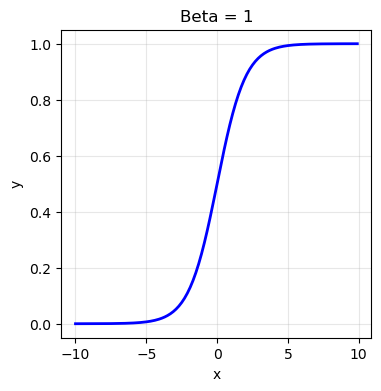

In [46]:
#funcao logistica
def logistica(x, beta):
    return 1/(1 +np.exp(-beta *x))

#gera os valores de x
x_val = np.arange(-10,10,0.1)

#calcula funcao logistica
beta = 1
y_val = logistica(x_val, beta)
plota_grafico(x_val,y_val,'Beta = ' +str(beta))

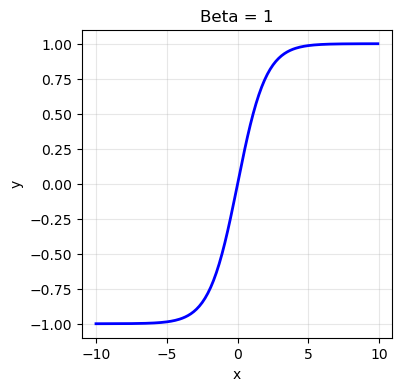

In [47]:
#funcao tangente hiperbolica
def tangente_hiperbolica(x, beta):
    return (1 -np.exp(-beta *x)) / (1 +np.exp(-beta *x))

y_val = tangente_hiperbolica(x_val, beta)
plota_grafico(x_val,y_val,'Beta = ' +str(beta))

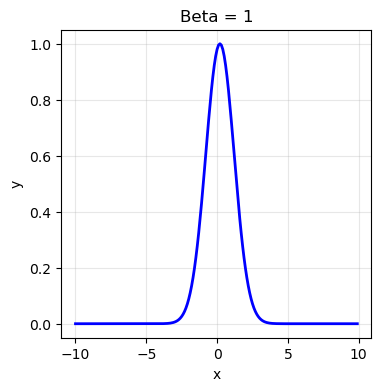

In [48]:
#funcao gaussiana
def gaussiana(x,c, rho):
    return np.exp(-(x - c)**2 / (2*rho**2))

#calcula funcao gaussiana
rho = 1
c = 0.2
y_val = gaussiana(x_val, c, rho)
plota_grafico(x_val,y_val,'Beta = ' +str(beta))

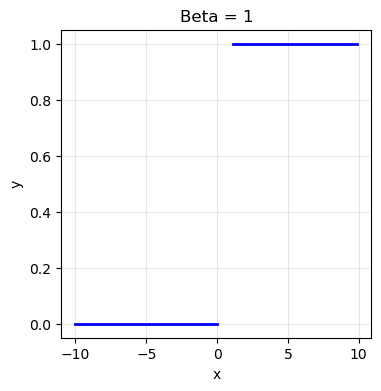

In [49]:
#funcao degrau
def degrau(x):
    if x >= 1:
        return 1
    elif x <= 0:
        return 0
    return None

y_val = [degrau(x_val) for x_val in x_val]
plota_grafico(x_val,y_val,'Beta = ' +str(beta))

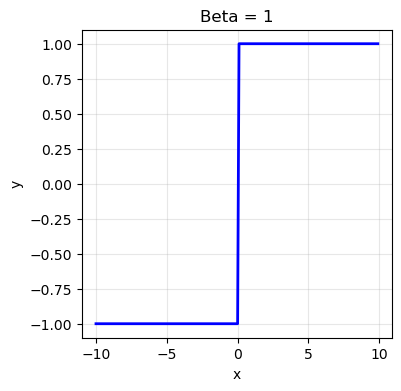

In [50]:
#funcao degrau bipolar
def degrau_bipolar(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    elif x < 0:
        return -1
    return None


y_val = [degrau_bipolar(x_val) for x_val in x_val]
plota_grafico(x_val,y_val,'Beta = ' +str(beta))

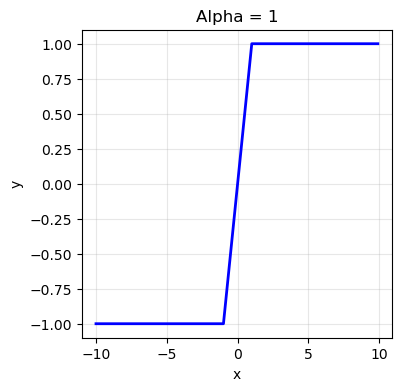

In [51]:
#funcao rampa simetrica
def rampa_simetrica(x, alpha):
    if x > alpha:
        return alpha
    elif -alpha <= x <= alpha:
        return x
    elif x < alpha:
        return -alpha
    return None


alpha = 1
y_val = [rampa_simetrica(x_val, alpha) for x_val in x_val]
plota_grafico(x_val,y_val,'Alpha = ' +str(beta))

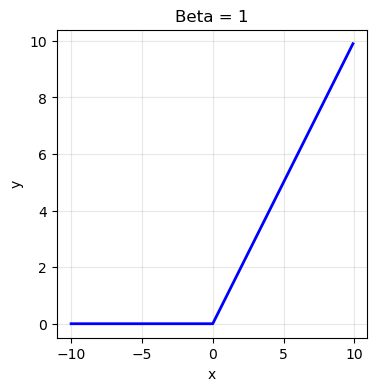

In [52]:
#funcao relu
def relu(x):
    return np.maximum(0,x)

y_val = [relu(x_val) for x_val in x_val]
plota_grafico(x_val,y_val,'Beta = ' +str(beta))

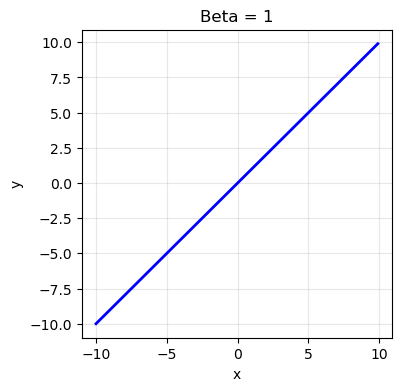

In [53]:
#funcao identidade
#x_val = y_val
y_val = x_val
plota_grafico(x_val,y_val,'Beta = ' +str(beta))